In [135]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pi = np.pi 
cos = np.cos 
sin = np.sin
acos = np.arccos
degrees = np.degrees
radians = np.radians

In [3]:
CATALOGUE = pd.read_csv("Modified Star Catalogue.csv")
#StarID: The database primary key from a larger "master database" of stars
#Mag: The star's apparent visual magnitude
#RA, Dec: The star's right ascension and declination, for epoch 2000.0 (Unit: RA - hrs; Dec - degrees)
CATALOGUE.sort_values('Mag', inplace=True)

In [42]:
CATALOGUE.head()
CATALOGUE.describe()

,StarID,RA,Dec,Mag
count,5068.000000,5068.000000,5068.000000,5068.000000
mean,42460.066101,11.916514,-2.457896,5.123936
std,24590.630243,6.778032,40.450822,0.870131
min,64.000000,0.017944,-88.956511,-1.440000
25%,20846.750000,6.117664,-36.487356,4.790000
50%,42075.500000,11.616352,-3.082253,5.390000
75%,63522.250000,17.937774,29.386892,5.740000
max,87404.000000,23.998586,89.264138,6.000000


In [5]:
def angularDistance(row):
    '''
    Computes the angular distance (degrees) between the reference Right-Ascension (RA)
    & Declination (Dec) value, and the corresponding RA - Dec value of the stars in 
    the dataframe - <IMG_DF>
    
    <Formula> - http://spiff.rit.edu/classes/phys373/lectures/radec/radec.html
    
    Parameters
    ----------
    row : pd.Dataframe - series
        Input RA/Dec in degrees from the <IMG_DF> dataframe
          
    Returns
    -------
    y : pd.Dataframe - series
        The corresponding angular distance in degree value.
    '''
    alpha1, alpha2 = radians(row['Ref_RA']), radians(row['RA'])
    delta1, delta2 = radians(row['Ref_Dec']), radians(row['Dec'])
    temp = cos(pi/2 - delta1)*cos(pi/2 - delta2) + sin(pi/2 - delta1)*sin(pi/2 - delta2)*cos(alpha1 - alpha2) 
    return np.degrees(acos(temp))


In [121]:
def generateImageDataframe(ref_ra, ref_dec, ref_ang_dist, mag_limit = 6, ra_hrs = True):
    '''
    Generates a dataframe consisting of stars that lie within the circular boundary
    for a given max angular distance value for the generation of a star-image.
    The max magnitude limit that the stars possess can be set manually (Default = 6 Mv).
    
    Parameters
    ----------
    ref_ra : floating-point number
        Input reference right-ascension value
        
    ref_dec : floating-point number
        Input reference declination value
        
    ref_ang_dist : floating-point number
        Input the circular field-of-view (FOV), the radius of which defines the conical
        boundary within which the stars from the catalogue should lie in
        
    mag_limit : floating-point number
        Input the maximum value of stars' magnitude that should be visible within with 
        circular FOV
        
    ra_hrs : boolean, default = True
        Input is true if the unit of right ascension is given in hour format
        Input is false if unit of right ascension is in degrees format 
        
        <Formula> - https://sciencing.com/calculate-longitude-right-ascension-6742230.html 
    Returns
    -------
    IMG_DF : pd.Dataframe
        This returns the dataframe consisting of stars that lie inside the specified circular FOV 
        that is sorted w.r.t the angular distance column in ascending order
    '''
    if ra_hrs == False:
        ref_ra = ref_ra/15
        
    IMG_DF = pd.DataFrame(columns=['Ref_RA', 'Ref_Dec', 'Star_ID', 'RA', 'Dec', 'Mag'])
    temp = CATALOGUE[CATALOGUE.Mag <= mag_limit]
    size = temp.StarID.shape[0]
    row_count = 0
    
    for i in range(size):
        s_id, ra, dec, mag = temp.iloc[i] 
        IMG_DF.loc[row_count] = [ref_ra] + [ref_dec] + [s_id] + [ra] + [dec] + [mag]
        row_count = row_count + 1
        
    IMG_DF['Ang_Dist'] = IMG_DF.apply(angularDistance, axis=1)
    IMG_DF.sort_values('Ang_Dist', inplace = True, ascending = True)
    IMG_DF = IMG_DF[IMG_DF.Ang_Dist <= ref_ang_dist]
    
    return IMG_DF

<IPython.core.display.Javascript object>


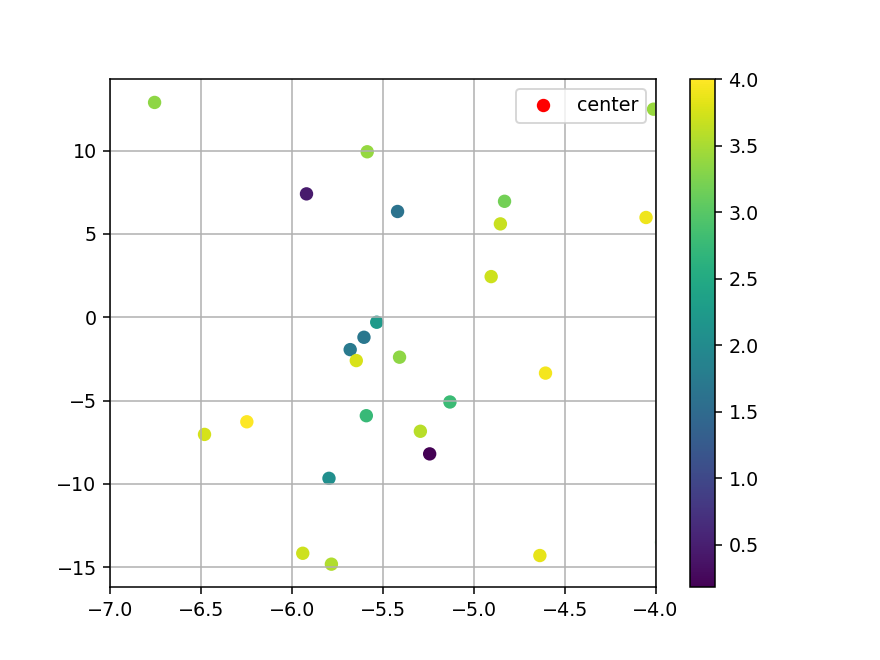

In [147]:
check = generateImageDataframe(83, -0.1, 15, 4, ra_hrs=False) 

plt.figure()
plt.scatter(-check.RA, check.Dec, c = check.Mag )
plt.plot(check.iloc[0].Ref_RA, check.iloc[0].Ref_Dec, 'ro', label = 'center')
plt.legend(loc='upper right')
plt.xlim(-7, -4)
plt.colorbar()
plt.grid()